In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

missing_values = ['na']
df = pd.read_csv(
    'https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv'
    , na_values = missing_values
    )

#df.head()
#df.dtypes
#df.columns

In [155]:
#focus on a high school network that has four high school locations on Algebra tests
sch = df[(df['School Name']=='New Visions Charter High School for Advanced Math')&
         (df['Regents Exam']=='Common Core Algebra')]

#drop unwanted columns
sch = sch.drop(['Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
                'Number Scoring CR', 'Percent Scoring CR'], axis=1)

#drop satisfactory(s) rows as they are incomparable
sch = sch[(sch['Mean Score']!='s')]

#drop duplicates
sch.drop_duplicates(keep='first',inplace=True)

#rename school names based on their location
sch.loc[df['School DBN']=='84X539','School Name'] = 'A.M.S.'
sch.loc[df['School DBN']=='84X202','School Name'] = 'A.M.S. II'
sch.loc[df['School DBN']=='84K738','School Name'] = 'A.M.S. III'
sch.loc[df['School DBN']=='84Q320','School Name'] = 'A.M.S. IV'

#create total score per class
sch['Mean Score'] = pd.to_numeric(sch['Mean Score'], errors = 'coerce')  #convert Mean Score from object to numeric
sch['Total Score'] = sch['Total Tested'] * sch['Mean Score']

#grouping by year and schools
schgrp = sch.groupby(['School Name','Year'])['Total Tested','Total Score'].sum().reset_index()  #reset_index to make school name reappears on each row

#create total mean
schgrp['Total Mean'] = schgrp['Total Score'] / schgrp['Total Tested']

schgrp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,School Name,Year,Total Tested,Total Score,Total Mean
0,A.M.S.,2015,569,34505.6,60.642531
1,A.M.S.,2016,1057,67674.6,64.025166
2,A.M.S.,2017,1058,71294.6,67.386200
3,A.M.S. II,2015,690,42825.9,62.066522
4,A.M.S. II,2016,1555,108179.0,69.568489
5,A.M.S. II,2017,1003,70393.6,70.183051
6,A.M.S. III,2015,655,39932.4,60.965496
7,A.M.S. III,2016,825,57050.6,69.152242
8,A.M.S. III,2017,702,49309.9,70.242023
9,A.M.S. IV,2016,625,41918.3,67.069280


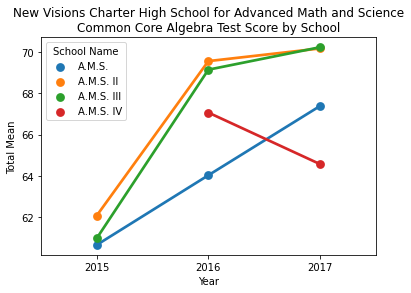

In [156]:
#plot graph for test mean by school by year
plt.title('New Visions Charter High School for Advanced Math and Science\nCommon Core Algebra Test Score by School')
g = sns.pointplot(x='Year', y='Total Mean', hue='School Name', data=schgrp)